In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sys
sys.path.append("../")
DATA_PATH = '../data/'

## Data

In [2]:
k = 0.01
sampled_data = pd.read_pickle(DATA_PATH + 'train_data.pkl').sample(frac=k, random_state=137)
# sample size

In [7]:
# scaling data
%load_ext autoreload
%autoreload 2
from data_pipeline import data_pipeline
# split on train and test
from sklearn.model_selection import train_test_split

pipeline = data_pipeline()
data = pipeline.fit_transform(sampled_data)
unused_features = ['index']
data = data.drop(unused_features, axis=1)
data = data.astype(np.float32)
data.info()

data_set_1 = data[data['seed_nbIT'] > 0]
data_set_2 = data[data['seed_nbIT'] == 0]
del data_set_2['seed_nbIT']

train_set_1, test_set_1 = train_test_split(data_set_1, test_size=0.3, random_state=42)
label_names = [
    'is_downstream_reconstructible',
]
x_train_1 = train_set_1.drop(label_names, axis=1)
y_train_1 = train_set_1[label_names].copy().astype(np.int32)

x_test_1 = test_set_1.drop(label_names, axis=1)
y_test_1 = test_set_1[label_names].copy().astype(np.int32)


train_set_2, test_set_2 = train_test_split(data_set_2, test_size=0.3, random_state=42)

x_train_2 = train_set_2.drop(label_names, axis=1)
y_train_2 = train_set_2[label_names].copy().astype(np.int32)

x_test_2 = test_set_2.drop(label_names, axis=1)
y_test_2 = test_set_2[label_names].copy().astype(np.int32)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17600 entries, 1042314 to 1301879
Data columns (total 16 columns):
is_downstream_reconstructible    17600 non-null float32
seed_chi2PerDoF                  17600 non-null float32
seed_p                           17600 non-null float32
seed_pt                          17600 non-null float32
seed_nLHCbIDs                    17600 non-null float32
seed_nbIT                        17600 non-null float32
seed_nLayers                     17600 non-null float32
seed_x                           17600 non-null float32
seed_y                           17600 non-null float32
seed_tx                          17600 non-null float32
seed_ty                          17600 non-null float32
seed_mva_value                   17600 non-null float32
seed_angle                       17600 non-null float32
seed_pr                          17600 non-null float32
seed_z_magn

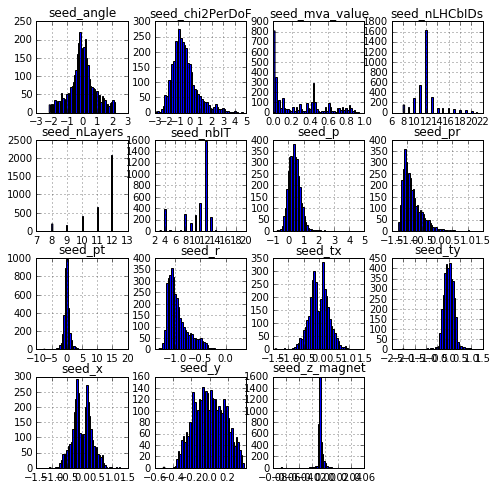

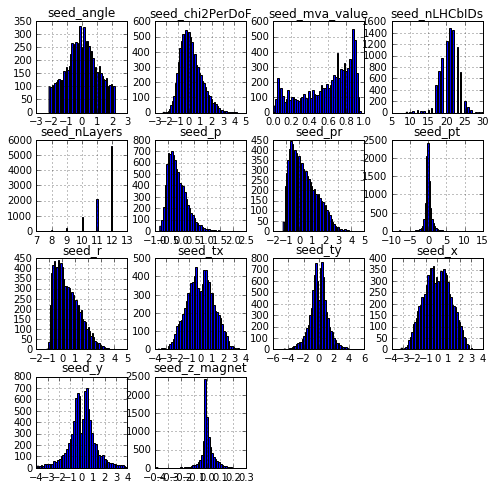

In [17]:
axarr_1 = x_train_1.hist(bins=50, figsize=(8,8))
axarr_2 = x_train_2.hist(bins=50, figsize=(8,8))

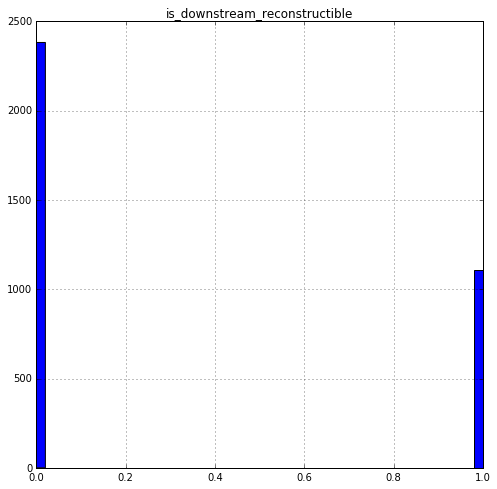

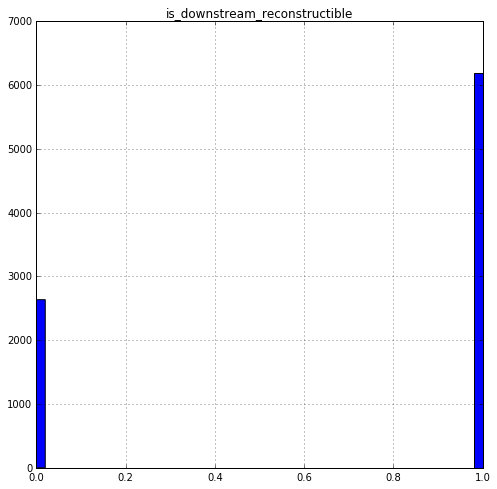

In [18]:
_ = y_train_1.hist(bins=50, figsize=(8,8))
_ = y_train_2.hist(bins=50, figsize=(8,8))

In [19]:
x_train_1.info()
x_train_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3488 entries, 1208671 to 779607
Data columns (total 15 columns):
seed_chi2PerDoF    3488 non-null float32
seed_p             3488 non-null float32
seed_pt            3488 non-null float32
seed_nLHCbIDs      3488 non-null float32
seed_nbIT          3488 non-null float32
seed_nLayers       3488 non-null float32
seed_x             3488 non-null float32
seed_y             3488 non-null float32
seed_tx            3488 non-null float32
seed_ty            3488 non-null float32
seed_mva_value     3488 non-null float32
seed_angle         3488 non-null float32
seed_pr            3488 non-null float32
seed_z_magnet      3488 non-null float32
seed_r             3488 non-null float32
dtypes: float32(15)
memory usage: 231.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8831 entries, 817591 to 343179
Data columns (total 14 columns):
seed_chi2PerDoF    8831 non-null float32
seed_p             8831 non-null float32
seed_pt            8831 non-nul

In [9]:
from models import KerasDNN

Using TensorFlow backend.


In [14]:
from keras.callbacks import TensorBoard
DNNclf_1 = KerasDNN(
    (x_train_1.shape[1],),
    (2,),
    neurons=100,
    layers=2,
    loss_metric='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    last_layer_act='softmax'
)
DNNclf_1.fit(
    x_train_1.values, y_train_1.values,
    epochs=10,
    validation_data=(x_test_1.values, y_test_1.values),
#     callbacks=[Tensorboard()]
)

Train on 12320 samples, validate on 5280 samples
Epoch 1/10
12320/12320 [==============================] - 1s - loss: 0.5144 - acc: 0.7591 - val_loss: 0.4810 - val_acc: 0.7756
Epoch 2/10
12320/12320 [==============================] - 1s - loss: 0.4676 - acc: 0.7886 - val_loss: 0.4461 - val_acc: 0.7886
Epoch 3/10
12320/12320 [==============================] - 1s - loss: 0.4600 - acc: 0.7890 - val_loss: 0.4377 - val_acc: 0.8008
Epoch 4/10
12320/12320 [==============================] - 1s - loss: 0.4556 - acc: 0.7914 - val_loss: 0.4400 - val_acc: 0.7960
Epoch 5/10
12320/12320 [==============================] - 1s - loss: 0.4576 - acc: 0.7902 - val_loss: 0.4316 - val_acc: 0.8013
Epoch 6/10
12320/12320 [==============================] - 1s - loss: 0.4471 - acc: 0.7939 - val_loss: 0.4388 - val_acc: 0.8030
Epoch 7/10
12320/12320 [==============================] - 1s - loss: 0.4414 - acc: 0.8006 - val_loss: 0.4257 - val_acc: 0.8108
Epoch 8/10
12320/12320 [==============================] - 1s -

In [ ]:
DNNclf_2 = KerasDNN(
    (x_train_2.shape[1],),
    (2,),
    neurons=100,
    layers=2,
    loss_metric='sparse_categorical_crossentropy',
    metrics=['accuracy'],
    last_layer_act='softmax'
)
DNNclf_2.fit(
    x_train_2.values, y_train_2.values,
    epochs=10,
    validation_data=(x_test_2.values, y_test_2.values),
#     callbacks=[Tensorboard()]
)